In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train dataset
train_df=pd.read_csv('train_yaOffsB.csv')
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
#import test dataset
test_df=pd.read_csv('test_pFkWwen.csv')
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [4]:
train_df.shape

(88858, 10)

In [5]:
train_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

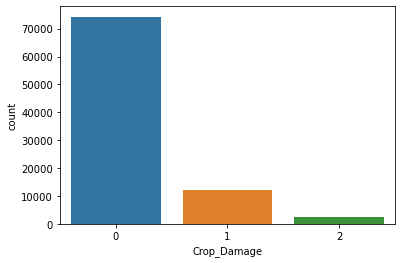

In [6]:
import seaborn as sns
sns.countplot(train_df['Crop_Damage'])

In [7]:
#finding the missing values
def missing_values(df):
    missing_values=pd.DataFrame({'count':df.isnull().sum(),'percentage':df.isnull().sum()/len(df)*100})
    missing_values.sort_values(by='percentage',inplace=True,ascending=False)
    return missing_values

In [8]:
#check for missing values in train_df
missing_values(train_df)

,count,percentage
Number_Weeks_Used,9000,10.12852
ID,0,0.00000
Estimated_Insects_Count,0,0.00000
Crop_Type,0,0.00000
Soil_Type,0,0.00000
Pesticide_Use_Category,0,0.00000
Number_Doses_Week,0,0.00000
Number_Weeks_Quit,0,0.00000
Season,0,0.00000
Crop_Damage,0,0.00000


In [9]:
#check for missing values in test_df
missing_values(test_df)

,count,percentage
Number_Weeks_Used,5893,9.93593
ID,0,0.00000
Estimated_Insects_Count,0,0.00000
Crop_Type,0,0.00000
Soil_Type,0,0.00000
Pesticide_Use_Category,0,0.00000
Number_Doses_Week,0,0.00000
Number_Weeks_Quit,0,0.00000
Season,0,0.00000


In [10]:
data=train_df.drop(columns='Crop_Damage')
label=train_df['Crop_Damage']

In [11]:
#split the train dataset 
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=.20,random_state=42)

# python fucntion to preprocess the train dataset

In [12]:
def train_preprocess(train,test):
    #create a list of category columns
    cat_cols=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
    #convert int to obj datatype
    train[cat_cols]=train[cat_cols].astype(str)
    test[cat_cols]=test[cat_cols].astype(str)
    #now wen can extract numaric columns
    num_cols=list(x_train.select_dtypes(include=[np.number]).columns)
    #replace the missing values of numaric cols using mean
    for col in num_cols:
        train[col]=train[col].fillna(train[col].median())
        test[col]=test[col].fillna(train[col].median())
    for col in cat_cols:
        #replace the missing values of category cols using mmode,
        #even though category cols not having missing values. Do it for future data.
        train[col]=train[col].fillna(train[col].mode()[0])
        test[col]=test[col].fillna(test[col].mode()[0])
    #encode the category cols using pandas
    train_oe=pd.get_dummies(train[cat_cols])
    test_oe=pd.get_dummies(test[cat_cols])
    oe_train,oe_test=train_oe.align(test_oe,join='inner',axis=1,fill_value=0)
    #concat the Numaric and encoded columns
    final_train=pd.concat([train[num_cols],oe_train],axis=1)
    final_test=pd.concat([test[num_cols],oe_test],axis=1)
    return final_train,final_test


In [13]:
final_x_train,final_x_test=train_preprocess(x_train,x_test)

In [14]:
final_x_train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
20892,1297,15,28.0,0,0,1,0,1,0,0,1,0,1,0
18771,1296,80,30.0,12,1,0,1,0,0,1,0,1,0,0
87274,1056,60,40.0,1,1,0,1,0,0,1,0,0,0,1
2782,1212,40,48.0,0,1,0,0,1,0,0,1,0,1,0
23023,984,30,28.0,0,1,0,0,1,0,0,1,0,0,1


In [15]:
#import classifier and metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [16]:
#create an object for classifire and train the algorithm
GBC=GradientBoostingClassifier()
GBC.fit(final_x_train,y_train)


GradientBoostingClassifier()

In [17]:
#predict the test data and evaluate using accuracy_score
GBC_pred=GBC.predict(final_x_test)
print(accuracy_score(y_test,GBC_pred))

0.841435966689174


In [18]:
stop

NameError: name 'stop' is not defined

# python fucntion to preprocess the test dataset

In [ ]:
def test_preprocess(test):
    #create a list of category columns
    cat_cols=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
    #convert int to obj datatype
    test[cat_cols]=test[cat_cols].astype(str)
    #now wen can extract numaric columns
    num_cols=list(x_test.select_dtypes(include=[np.number]).columns)
    #replace the missing values of numaric cols using mean
    for col in num_cols:
        test[col]=test[col].fillna(test[col].mean())
    for col in cat_cols:
        #replace the missing values of category cols using mmode,
        #even though category cols not having missing values. Do it for future data.
        test[col]=test[col].fillna(test[col].mode()[0])
    #encode the category cols using pandas
    test_oe=pd.get_dummies(test[cat_cols])
    #concat the Numaric and encoded columns
    final_test=pd.concat([test[num_cols],test_oe],axis=1)
    return final_test


In [ ]:
#preprocess the final test dataset
original_test=test_preprocess(test_df)

In [ ]:
original_test.head()

In [ ]:
#predict the label for original test dataset
label_for_test=GBC.predict(original_test)


In [ ]:
submisssion=pd.DataFrame({'ID':test_df["ID"],'Crop_Damage':label_for_test})


In [ ]:
submisssion.to_csv(r'submission.csv', index = False)